In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_CSV.csv", index_col=None)
data.columns = ['age', 'sex', 'state', 'citizen', 'race', 'marital',
                'num_in_house', 'num_child', 'educ', 'worker_class', 'industry',
                'occupation', 'weekly_hrs', 'fam_income', 'fam_inc_50', 'ismarried']

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,sex,state,citizen,race,marital,num_in_house,num_child,educ,worker_class,industry,occupation,weekly_hrs,fam_income,fam_inc_50,ismarried
0,57,1,15,1,15,6,1,0,39,4,23,21,6,15,1,0
1,56,1,15,1,15,4,1,0,41,4,23,22,6,16,1,0
2,70,1,15,1,15,1,5,0,43,4,10,22,6,16,1,1
3,42,1,15,1,15,1,5,3,40,2,51,22,5,10,0,1
4,38,2,15,1,15,1,8,2,43,4,41,10,5,16,1,1


In [3]:
# First show just using two variables, then check using other variables

def getColor(arr):
    colorList = [];
    for x in arr:
        if (x == 1):
            colorList.append("magenta")
        else:
            colorList.append("green")
    return colorList;        

# Family Income >50,000

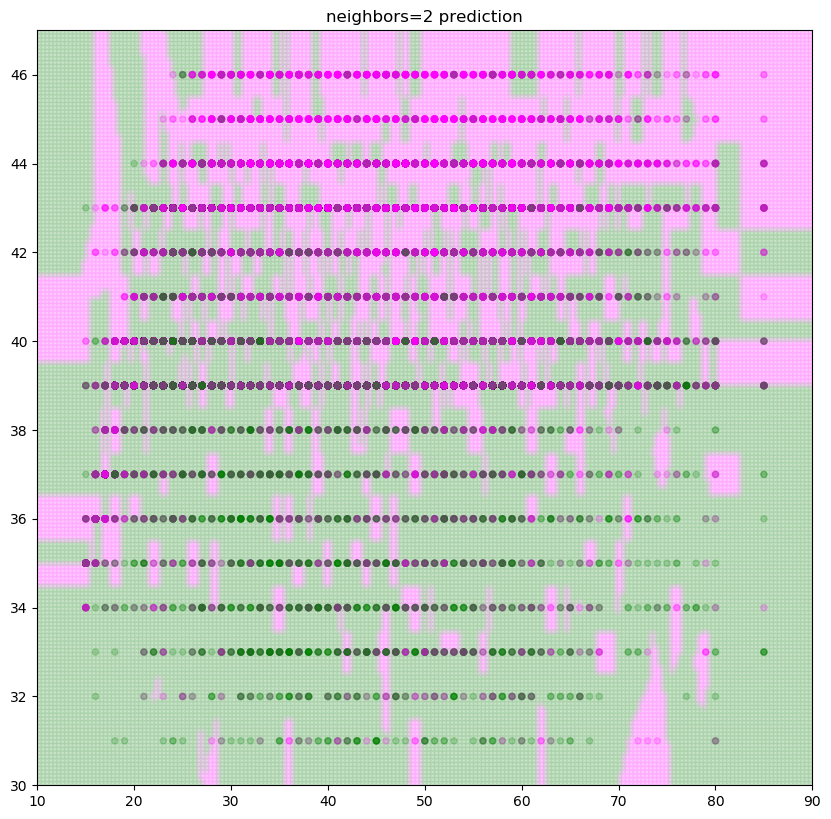

In [4]:
colorList = getColor(data_train['fam_inc_50'])

T2 = neighbors.KNeighborsClassifier(n_neighbors=2)
T2.fit(data_train[['age','educ']],data_train['fam_inc_50'])

x_min, x_max = 10, 90
y_min, y_max = 30, 47
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

# Evaluate model
colorPredict = getColor(T2.predict(test[['x1','x2']])) 

fig,ax = plt.subplots(figsize=(10,10), dpi=100)
ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
ax.scatter(data_train['age'], data_train['educ'],  color=colorList, s=20, alpha=.2)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("neighbors=2 prediction")
plt.show(fig)

1:	0.6136331557706142	0.6101879590576426
2:	0.5630011838109672	0.5541921242461272
3:	0.6424490924593783	0.6358308039996321
4:	0.6155364251035205	0.6082857851445991
5:	0.653889767504567	0.6493321902058943
6:	0.6347923394127343	0.6309364611665155
7:	0.6600513499822214	0.6619270402196908
8:	0.648724520594268	0.6455253787430854
9:	0.669611623855065	0.6606594170050062
10:	0.6608446895768534	0.6541347215105049
11:	0.6730775160588724	0.6653711222357996
12:	0.6688411164877331	0.6592089919455504
13:	0.6762719797306567	0.6718931898511306
14:	0.6707897860257989	0.6660946923410462


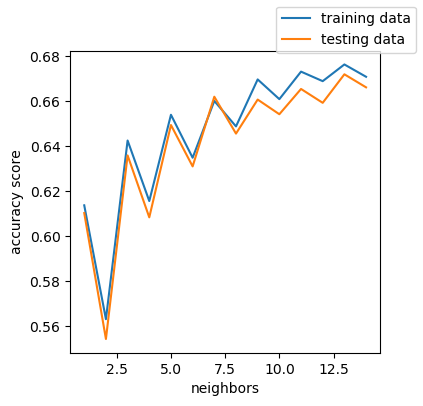

In [5]:
# Score prediction
nb = np.arange(1,15)
score_train = []
score_test = []
for d in nb:
    T = neighbors.KNeighborsClassifier(n_neighbors=d)
    T.fit(data_train[['age','educ']], data_train['fam_inc_50'])
    s_train = cross_val_score(T, data_train[['age','educ']], data_train['fam_inc_50'],cv=5,
                     n_jobs=-1)
    s_test = cross_val_score(T, data_test[['age','educ']], data_test['fam_inc_50'],cv=5,
                     n_jobs=-1)
    print(f"{d}:\t{s_train.mean()}\t{s_test.mean()}")
    
    # print score of training data vs testing data
    score_train.append(s_train.mean())
    score_test.append(s_test.mean())
    
# graph scores of training data vs testing data    
fig,ax = plt.subplots(1, figsize=(4,4), dpi=100)
ax.plot(nb, score_train, label="training data")
ax.plot(nb, score_test, label="testing data")
ax.set_xlabel("neighbors")
ax.set_ylabel("accuracy score")
fig.legend()
plt.show() 

1:	0.6543431561369322	0.6387288619969255
2:	0.6084908155544373	0.5905229643790978
3:	0.6858775665833644	0.6739769337905843
4:	0.6637219293083729	0.6541333254496958
5:	0.7012369193839051	0.6892886002601599
6:	0.6889584925413977	0.6766957211557412
7:	0.7077838941267991	0.6906472959123339
8:	0.7010330201302166	0.6820395134481716
9:	0.7133342227736703	0.6948159334883783
10:	0.7090753450648015	0.6891076050823183
11:	0.7174345167328509	0.698170503370255
12:	0.7141951635614154	0.6921903537125363
13:	0.7188618859789802	0.7002543294309328
14:	0.7154411681191022	0.6978995033308368
15:	0.7190429837717516	0.7018869814865912
16:	0.7169361975419746	0.6972653632385983
17:	0.721240431811378	0.7063261263747093
18:	0.7190428888188138	0.7036085708279133
19:	0.7223051384058483	0.7087728461245352


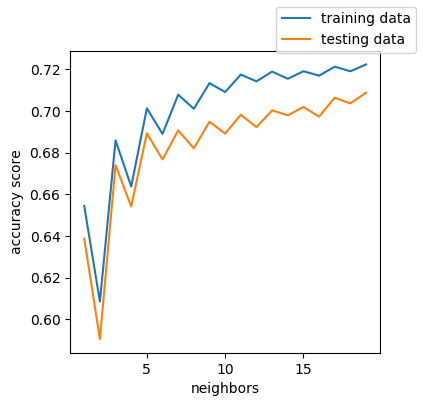

In [6]:
nb = np.arange(1,20)
score_train = []
score_test = []
for d in nb:
    T = neighbors.KNeighborsClassifier(n_neighbors=d)
    T.fit(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_train['fam_inc_50'])
    s_train = cross_val_score(T, data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_train['fam_inc_50'],cv=5,
                     n_jobs=-1)
    s_test = cross_val_score(T, data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_test['fam_inc_50'],cv=5,
                     n_jobs=-1)
    print(f"{d}:\t{s_train.mean()}\t{s_test.mean()}")
    
    # print score of training data vs testing data
    score_train.append(s_train.mean())
    score_test.append(s_test.mean())
    
# graph scores of training data vs testing data    
fig,ax = plt.subplots(1, figsize=(4,4), dpi=100)
ax.plot(nb, score_train, label="training data")
ax.plot(nb, score_test, label="testing data")
ax.set_xlabel("neighbors")
ax.set_ylabel("accuracy score")
fig.legend()
plt.show()    

# Is individual married

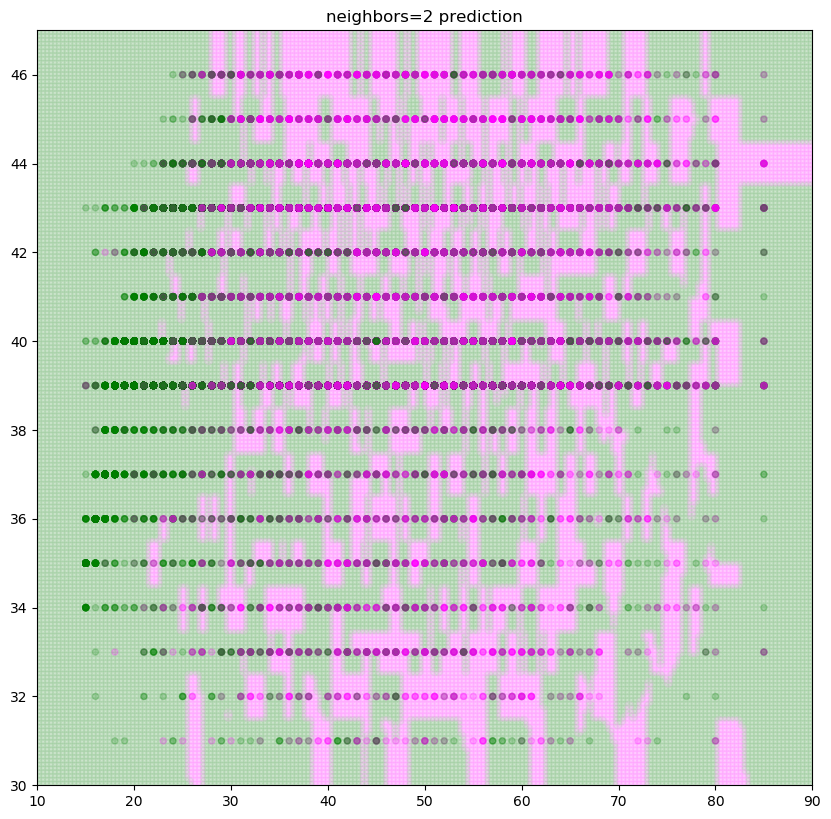

In [7]:
colorList = getColor(data_train['ismarried'])

T2 = neighbors.KNeighborsClassifier(n_neighbors=2)
T2.fit(data_train[['age','educ']],data_train['ismarried'])

x_min, x_max = 10, 90
y_min, y_max = 30, 47
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

# Evaluate model
colorPredict = getColor(T2.predict(test[['x1','x2']])) 

fig,ax = plt.subplots(figsize=(10,10), dpi=100)
ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
ax.scatter(data_train['age'], data_train['educ'],  color=colorList, s=20, alpha=.2)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("neighbors=2 prediction")
plt.show(fig)

1:	0.5968004819423014	0.598043708200297
2:	0.5552983890955423	0.562070341755686
3:	0.6249374762992865	0.6169826691368732
4:	0.6027815747382596	0.5928795971461233
5:	0.6443747347700948	0.639274803894517
6:	0.6246429075406625	0.6197905580301418
7:	0.6516921193299812	0.6525937167409042
8:	0.6365367427124957	0.6312995190981119
9:	0.6585793632019195	0.6534989389937851
10:	0.6455304829018755	0.6434427023795446
11:	0.6615468746873046	0.6649168276242658
12:	0.6537312299329683	0.6568517843299565
13:	0.6646730135402593	0.6708047551473583
14:	0.6575595872496705	0.6621056538820345


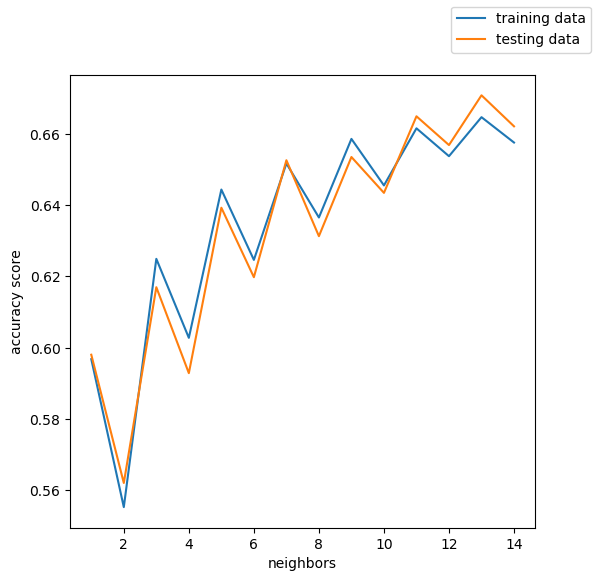

In [8]:
# Score prediction
nb = np.arange(1,15)
score_train = []
score_test = []
for d in nb:
    T = neighbors.KNeighborsClassifier(n_neighbors=d)
    T.fit(data_train[['age','educ']], data_train['ismarried'])
    s_train = cross_val_score(T, data_train[['age','educ']], data_train['ismarried'],cv=5,
                     n_jobs=-1)
    s_test = cross_val_score(T, data_test[['age','educ']], data_test['ismarried'],cv=5,
                     n_jobs=-1)
    print(f"{d}:\t{s_train.mean()}\t{s_test.mean()}")
    
    # print score of training data vs testing data
    score_train.append(s_train.mean())
    score_test.append(s_test.mean())
    
# graph scores of training data vs testing data    
fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.plot(nb, score_train, label="training data")
ax.plot(nb, score_test, label="testing data")
ax.set_xlabel("neighbors")
ax.set_ylabel("accuracy score")
fig.legend()
plt.show()    

1:	0.7480855160225802	0.7259882468104116
2:	0.7264055427469787	0.7036961941739919
3:	0.7763578821837858	0.7481879130697571
4:	0.7656197951437334	0.7423868698017265
5:	0.7843999659274183	0.7602380530043229
6:	0.7800732201309434	0.7563436181954354
7:	0.7861670552001482	0.7625039418187551
8:	0.7848305940995937	0.7636815601718633
9:	0.7878208993211655	0.7642247099478366
10:	0.7870733910069936	0.7655847195395956
11:	0.7889081892731917	0.7688459997109333
12:	0.7888856675018896	0.7694816179852051
13:	0.7894519137861054	0.7696615455871341
14:	0.7893840405874236	0.7687563233342531
15:	0.7901542451409368	0.7678502798691316
16:	0.7900409743321595	0.7662187775106101
17:	0.7882739928191007	0.7673063910021417
18:	0.7887043952091076	0.7673967243486144
19:	0.7882512350028044	0.7689367436635263


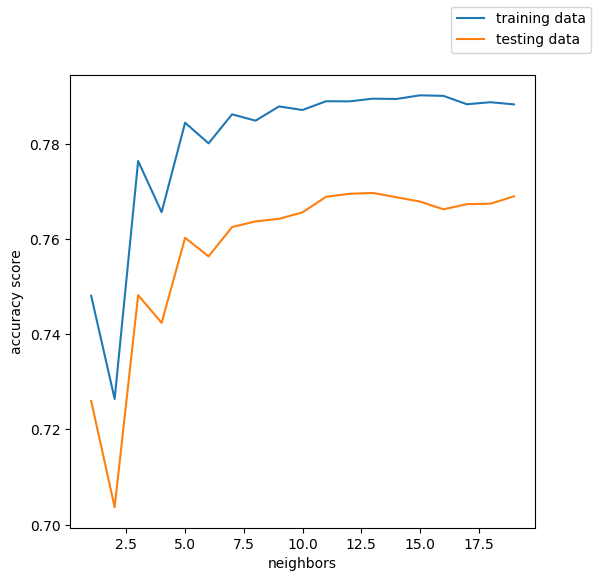

In [9]:
# Score with additional numerical variables

nb = np.arange(1,20)
score_train = []
score_test = []
for d in nb:
    T = neighbors.KNeighborsClassifier(n_neighbors=d)
    T.fit(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'])
    s_train = cross_val_score(T, data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],cv=5,
                     n_jobs=-1)
    s_test = cross_val_score(T, data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data_test['ismarried'],cv=5,
                     n_jobs=-1)
    print(f"{d}:\t{s_train.mean()}\t{s_test.mean()}")
    
    # print score of training data vs testing data
    score_train.append(s_train.mean())
    score_test.append(s_test.mean())
    
# graph scores of training data vs testing data    
fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.plot(nb, score_train, label="training data")
ax.plot(nb, score_test, label="testing data")
ax.set_xlabel("neighbors")
ax.set_ylabel("accuracy score")
fig.legend()
plt.show()    